In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [13]:
# Load the Wine Dataset
print("Loading Wine Dataset...")
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['cultivar'] = wine_data.target

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print("\nClass Distribution:")
print(df['cultivar'].value_counts().sort_index())

Loading Wine Dataset...
Dataset Shape: (178, 14)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

In [14]:
# Select 6 features
selected_features = [
    'alcohol',
    'malic_acid',
    'flavanoids',
    'color_intensity',
    'hue',
    'proline'
]

print(f"Selected Features: {selected_features}")

X = df[selected_features]
y = df['cultivar']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Selected Features: ['alcohol', 'malic_acid', 'flavanoids', 'color_intensity', 'hue', 'proline']

Features shape: (178, 6)
Target shape: (178,)


In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

Training Set: 142 samples
Test Set: 36 samples


In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")

Feature scaling completed!
Scaled training data shape: (142, 6)


In [17]:
# Train Random Forest
print("Training Random Forest Classifier...")
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)

model.fit(X_train_scaled, y_train)
print("✓ Model training completed!")

Training Random Forest Classifier...
✓ Model training completed!


In [18]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred,
                          target_names=['Cultivar 0', 'Cultivar 1', 'Cultivar 2']))

Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

  Cultivar 0       1.00      1.00      1.00        12
  Cultivar 1       1.00      1.00      1.00        14
  Cultivar 2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


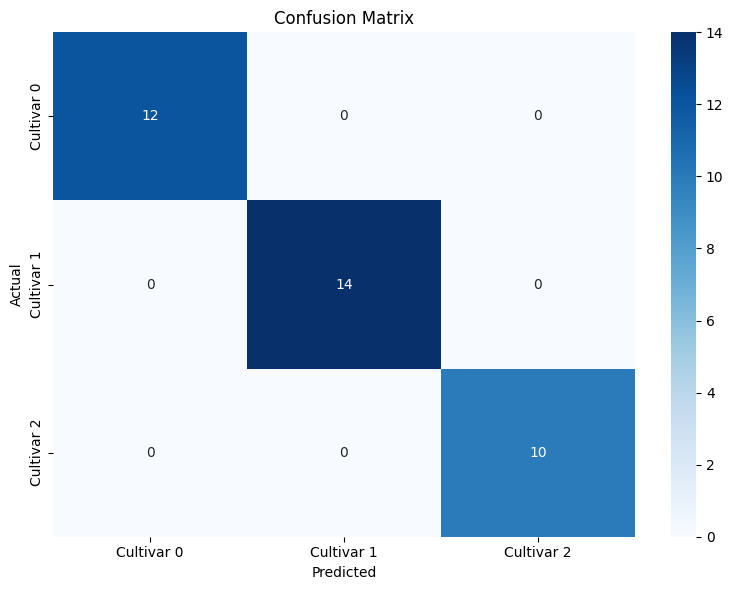

✓ Confusion matrix saved!


In [19]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cultivar 0', 'Cultivar 1', 'Cultivar 2'],
            yticklabels=['Cultivar 0', 'Cultivar 1', 'Cultivar 2'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Confusion matrix saved!")

Feature Importance:
           feature  importance
3  color_intensity    0.263146
2       flavanoids    0.210880
5          proline    0.199773
0          alcohol    0.139233
4              hue    0.129081
1       malic_acid    0.057888


/tmp/ipython-input-1582869095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


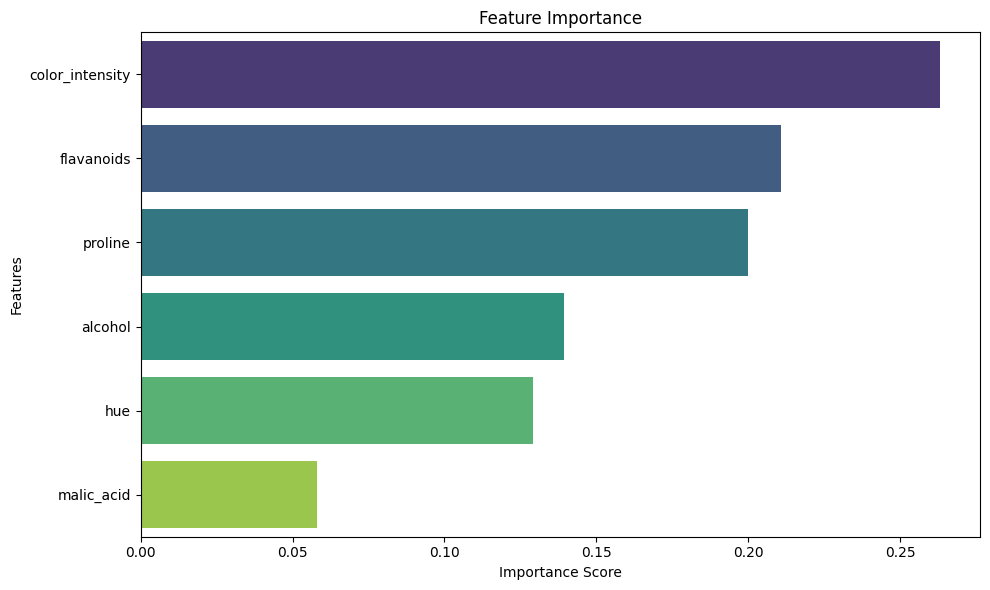

✓ Feature importance plot saved!


In [20]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Feature importance plot saved!")

In [21]:
# Save model using Joblib
print("Saving model files...")

# Save model
joblib.dump(model, 'wine_cultivar_model.pkl')
print("✓ Model saved: wine_cultivar_model.pkl")

# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("✓ Scaler saved: scaler.pkl")

# Save feature names
joblib.dump(selected_features, 'feature_names.pkl')
print("✓ Feature names saved: feature_names.pkl")

print("\n🎉 All files saved successfully!")

Saving model files...
✓ Model saved: wine_cultivar_model.pkl
✓ Scaler saved: scaler.pkl
✓ Feature names saved: feature_names.pkl

🎉 All files saved successfully!


In [22]:
# Test that files can be loaded
print("Testing model loading...")

loaded_model = joblib.load('wine_cultivar_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_features = joblib.load('feature_names.pkl')

print("✓ Model loaded successfully!")
print("✓ Scaler loaded successfully!")
print("✓ Features loaded successfully!")

# Make a test prediction
sample = X_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

print(f"\n✓ Test Prediction: Cultivar {prediction[0]}")
print(f"✓ Actual: Cultivar {y_test.iloc[0]}")
print("\n🎉 Everything works perfectly!")

Testing model loading...
✓ Model loaded successfully!
✓ Scaler loaded successfully!
✓ Features loaded successfully!

✓ Test Prediction: Cultivar 0
✓ Actual: Cultivar 0

🎉 Everything works perfectly!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')